<a href="https://colab.research.google.com/github/Patryk9411/ML-Python-pocket-lexicon/blob/master/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Connecting into GCP input tables

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
# !pip install --upgrade google-cloud-storage

In [2]:
pip install snowflake-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.6/194.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import os
import snowflake.connector
from google.cloud import storage

/usr/local/lib/python3.10/dist-packages/snowflake/connector/options.py:108: UserWarning: You have an incompatible version of 'pyarrow' installed (9.0.0), please install a version that adheres to: 'pyarrow<10.1.0,>=10.0.1; extra == "pandas"'
  warn_incompatible_dep(


### 1.1 Requirments of input table:
- TPNB - total product number base - ID
- TPNB Description	
- Supplier (TD: compare to others in that sector )
- Store ID
- Store Name
- Promotion indicator
- Post Code
- Quantity in the package (TD: compare to ave)
- Package size (TD: compare to ave)
- What kind of product (fruit, drink, snack etc?)
- Year week number 
- Sales Value TY AND OTHER MEASURES

all_data without duplicates

In [4]:
import os
import glob
import pandas as pd

project_id = 'wbmf-318914'
client = storage.Client(project=project_id)

bucket_name = 'prod_cleaning_bucket'

# Get a list of all files in the bucket
bucket = client.get_bucket(bucket_name)
blobs = bucket.list_blobs()

# Create an empty DataFrame to store the merged data
all_data = pd.DataFrame()

# Specify the required columns
required_columns = ['TPNB Description', 'Store ID', 'Sales Value TY', 'Year Week Number', 'Sales Volume TY', 'Profit TY']

# Set to store unique file contents
file_contents = set()

# Iterate over the files
for blob in blobs:
    file_name = blob.name
    # Check if the file meets the condition
    if file_name.startswith('wbmf_webapp_tl_upload') and file_name.endswith('.csv'):
        # Download the file
        blob.download_to_filename(file_name)

        # Read the CSV file into a DataFrame
        input_table = pd.read_csv(file_name)

        # Check if the required columns are present in the DataFrame
        if all(col in input_table.columns for col in required_columns):
            # Check if the file content has been seen before
            file_content = input_table.to_csv(index=False)
            if file_content not in file_contents:
                # Add the file content to the set
                file_contents.add(file_content)
                # Select only the required columns
                input_table = input_table[required_columns]
                # Concatenate the DataFrame to the merged data
                all_data = pd.concat([all_data, input_table], ignore_index=True)

        # Remove the downloaded file
        os.remove(file_name)

# Print the columns of the merged data
print(all_data.columns)

Index(['TPNB Description', 'Store ID', 'Sales Value TY', 'Year Week Number',
       'Sales Volume TY', 'Profit TY'],
      dtype='object')


all_data with duplicates

In [5]:
# import os
# import glob
# import pandas as pd

# project_id = 'wbmf-318914'
# client = storage.Client(project=project_id)

# bucket_name = 'prod_cleaning_bucket'

# # Get a list of all files in the bucket
# bucket = client.get_bucket(bucket_name)
# blobs = bucket.list_blobs()

# # Create an empty DataFrame to store the merged data
# all_data = pd.DataFrame()

# # Specify the required columns
# required_columns = ['TPNB Description', 'Store ID', 'Sales Value TY', 'Year Week Number', 'Sales Volume TY', 'Profit TY']

# # Flag to check if file is found
# file_found = False

# # Iterate over the files
# for blob in blobs:
#     file_name = blob.name
#     # Check if the file meets the condition
#     if file_name.startswith('wbmf_webapp_tl_upload') and file_name.endswith('.csv'):
#         # Download the file
#         blob.download_to_filename(file_name)

#         # Read the CSV file into a DataFrame
#         input_table = pd.read_csv(file_name)

#         # Check if the required columns are present in the DataFrame
#         if all(col in input_table.columns for col in required_columns):
#             # Select only the required columns
#             input_table = input_table[required_columns]

#             # Concatenate the DataFrame to the merged data
#             all_data = pd.concat([all_data, input_table], ignore_index=True)

#             # Set file found flag to True
#             file_found = True

#         # Remove the downloaded file
#         os.remove(file_name)

# # Print the columns of the merged data
# print(all_data.columns)

Index(['TPNB Description', 'Store ID', 'Sales Value TY', 'Year Week Number',
       'Sales Volume TY', 'Profit TY'],
      dtype='object')


Check values of columns in input tables

Duplicates:

wbmf_webapp_tl_upload_20211126-135901.csv

wbmf_webapp_tl_upload_20211126-140355.csv


In [12]:
# import os
# import glob
# import pandas as pd

# project_id = 'wbmf-318914'
# client = storage.Client(project=project_id)

# bucket_name = 'prod_cleaning_bucket'

# # Get a list of all files in the bucket
# bucket = client.get_bucket(bucket_name)
# blobs = bucket.list_blobs()

# # Iterate over the files
# for blob in blobs:
#     file_name = blob.name
#     # Check if the file meets the condition
#     if file_name.startswith('wbmf_webapp_tl_upload') and file_name.endswith('.csv'):
#         # Download the file
#         blob.download_to_filename(file_name)

#         # Read the CSV file into a DataFrame
#         input_table = pd.read_csv(file_name)

#         # Check if 'Store ID' column exists and has the required value
#         if 'Store ID' in input_table.columns and 'TPNB Description' in input_table.columns and 'Year Week Number' in input_table.columns and \
#                 (input_table['Store ID'] == 2947).any() and \
#                 (input_table['Year Week Number'] == 202138).any() and \
#                 (input_table['TPNB Description'] == 'St Ewe West Country 12 Large Free Range Eggs').any():
#             # Print the file name
#             print(file_name)

#         # Remove the downloaded file
#         os.remove(file_name)




# # wbmf_webapp_tl_upload_20211126-124610.csv
# # wbmf_webapp_tl_upload_20211126-135901.csv
# # wbmf_webapp_tl_upload_20211126-140355.csv


wbmf_webapp_tl_upload_20211126-124610.csv
wbmf_webapp_tl_upload_20211126-135901.csv
wbmf_webapp_tl_upload_20211126-140355.csv


In [5]:
# Display the DataFrame
# print(df.to_string(index=False))
# display(input_table)
all_data = all_data.rename(columns={'Store ID': 'STORE_ID'})
# all_sales_data['STORE_ID'] = all_sales_data['STORE_ID'].astype('int64')
all_data.head(2)
record_count = all_data.shape[0]
print("Liczba rekordów:", record_count)

Liczba rekordów: 1327541


In [7]:
# #check duplicates
# filtered_data = all_data.loc[(all_data['Year Week Number'] == 202138) & (all_data['TPNB Description'] == 'St Ewe West Country 12 Large Free Range Eggs') & (all_data['STORE_ID'] == 2947)]
# display(filtered_data)

# 2. Connection to snowflake

In [11]:
# pip install snowflake-connector-python  

In [12]:
# pip install snowflake-connector-python

In [13]:
# pip install snowflake-sqlalchemy

In [8]:
import getpass

pwd = getpass.getpass("Enter password:")

Enter password:··········


In [9]:
from snowflake.connector.pandas_tools import write_pandas
from snowflake.connector import connect

# establish snowflake connection 
conn_params = {
    "census": {
        "user": "PATRYKKOPROWICZ",
        "password": str(pwd),
        "role": "READ_ONLY",
        "account": "kf44847.eu-west-2.aws",
        "database": "RAW",
        "schema": "CENSUS_DATA",
        "warehouse": "DEVELOPER_XS",
    },
    "kimi": {
        "user": "PATRYKKOPROWICZ",
        "password": str(pwd),
        "role": "READ_ONLY",
        "account": "kf44847.eu-west-2.aws",
        "database": "ANALYTICS",
        "schema": "DBT_KMALISZEWSKI",
        "warehouse": "DEVELOPER_XS",
    }
}

conn_census = connect(**conn_params["census"])
conn_kimi = connect(**conn_params["kimi"])


### 2.1. Kimi data
##### 2.1.1. DICT TESCO STORIES

Duplicates: store_id = 2947

In [10]:
pd.set_option('display.max_columns', None)

In [47]:
query_tesco_stories = "SELECT * FROM ANALYTICS.DBT_KMALISZEWSKI.DIM_TESCO_STORES"

tesco_stories = pd.read_sql(query_tesco_stories, conn_kimi)
tesco_stories['STORE_ID'] = tesco_stories['STORE_ID'].astype('int64')
tesco_stories_unique = tesco_stories.drop_duplicates(subset=['STORE_ID'])
tesco_stories_unique.head()

# filtered_df = tesco_stories_unique[tesco_stories_unique['STORE_ID'] == 2947]
# filtered_df.head()

<ipython-input-47-54e4d75f3d56>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tesco_stories = pd.read_sql(query_tesco_stories, conn_kimi)


,STORE_NAME,STORE_ID,FORMAT,AFFLUENCE,COUNTY,REGION,POSTCODE,LONGITUDE,LATITUDE
0,ARDLEIGH HRNCHRCH EXP,5079,Express,Midmarket,London,LO,RM11 2LG,0.220896,51.583278
1,NEWTON-LE-WILLOWS,5112,Superstore,Price Sensitive,Merseyside,NW,WA12 9LN,-2.640456,53.451615
2,EARNSHAW BRIDGE EXP,5212,Express,Midmarket,Lancashire,NW,PR25 1XD,-2.713883,53.698247
3,STANMORE MIDDLESX EXP,5288,Express,Midmarket,London,LO,HA7 1JN,-0.294275,51.596507
4,PENARTH,3019,Superstore,Midmarket,Invalid County,WA,CF64 1SA,-3.184242,51.445141


##### 2.1.2. DICT WEEK TO DATE

In [12]:
query_week_date = "SELECT * FROM ANALYTICS.DBT_KMALISZEWSKI.STG_WEEKS_TO_DATES"

week_date = pd.read_sql(query_week_date, conn_kimi)
week_date.head()

<ipython-input-12-5dd156c3cd2e>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  week_date = pd.read_sql(query_week_date, conn_kimi)


,INDEX,WEEK,DATE_TIME,DATE_TIME_RAW
0,0,201801,2018-02-26,2018-02-26
1,1,201802,2018-03-05,2018-03-05
2,2,201803,2018-03-12,2018-03-12
3,3,201804,2018-03-19,2018-03-19
4,4,201805,2018-03-26,2018-03-26


### 2.2. Census data
##### 2.2.1. POSTCODE - GEOCODE

In [33]:
query_code = "SELECT * FROM RAW.CENSUS_UK.POSTCODE_GEOCODE"

code = pd.read_sql(query_code, conn_census)
code.head()

<ipython-input-33-242906322983>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  code = pd.read_sql(query_code, conn_census)


,POSTCODE,GEOGRAPHY_CODE
0,AB10 1AB,S02001261
1,AB10 1AF,S02001261
2,AB10 1AG,S02001261
3,AB10 1AH,S02001261
4,AB10 1AL,S02001261


##### 2.2.2. DEMOGRAPHY
Resident population age

In [14]:
query_demography = "SELECT * FROM RAW.CENSUS_UK.CENSUS_DEMOGRAPHY"

demography = pd.read_sql(query_demography, conn_census)
demography.head()

<ipython-input-14-62c8da304102>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  demography = pd.read_sql(query_demography, conn_census)


,GEOGRAPHY_CODE,RESIDENT_POPULATION_AGE_0_TO_4,RESIDENT_POPULATION_AGE_10_TO_15,RESIDENT_POPULATION_AGE_16_TO_19,RESIDENT_POPULATION_AGE_20_TO_24,RESIDENT_POPULATION_AGE_25_TO_29,RESIDENT_POPULATION_AGE_30_TO_34,RESIDENT_POPULATION_AGE_35_TO_39,RESIDENT_POPULATION_AGE_40_TO_44,RESIDENT_POPULATION_AGE_45_TO_49,RESIDENT_POPULATION_AGE_5_TO_9,RESIDENT_POPULATION_AGE_50_TO_54,RESIDENT_POPULATION_AGE_55_TO_59,RESIDENT_POPULATION_AGE_60_TO_64,RESIDENT_POPULATION_AGE_65_TO_69,RESIDENT_POPULATION_AGE_70_TO_74,RESIDENT_POPULATION_AGE_75_TO_79,RESIDENT_POPULATION_AGE_80_TO_84,RESIDENT_POPULATION_AGE_85_AND_OVER,TOTAL_RESIDENT_POPULATION,WORKDAY_POPULATION_AGE_0_TO_4,WORKDAY_POPULATION_AGE_10_TO_15,WORKDAY_POPULATION_AGE_16_TO_19,WORKDAY_POPULATION_AGE_20_TO_24,WORKDAY_POPULATION_AGE_25_TO_29,WORKDAY_POPULATION_AGE_30_TO_34,WORKDAY_POPULATION_AGE_35_TO_39,WORKDAY_POPULATION_AGE_40_TO_44,WORKDAY_POPULATION_AGE_45_TO_49,WORKDAY_POPULATION_AGE_5_TO_9,WORKDAY_POPULATION_AGE_50_TO_54,WORKDAY_POPULATION_AGE_55_TO_59,WORKDAY_POPULATION_AGE_60_TO_64,WORKDAY_POPULATION_AGE_65_TO_69,WORKDAY_POPULATION_AGE_70_TO_74,WORKDAY_POPULATION_AGE_75_TO_79,WORKDAY_POPULATION_AGE_80_TO_84,WORKDAY_POPULATION_AGE_85_AND_OVER,DIVORCED,MARRIED,SAME_SEX_PARTNERSHIP,SEPARATED,SINGLE,WIDOWED
0,E02000001,236.0,65.0,169.0,33.0,72.0,92.0,545.0,956.0,2045.0,117.0,1547.0,463.0,587.0,331.0,75.0,42.0,41.4,39.0,7375.0,236,202,2658,27025,67599,70541,56629,45977,36052,182,24622,15064,8471,2571,1057,516,374,299,524,2235,117,174,3434,271
1,E02000002,628.0,208.0,446.0,91.0,182.0,161.0,424.0,510.0,1388.0,378.0,999.0,259.0,437.0,419.0,156.0,89.0,36.2,33.0,6775.0,628,537,304,290,338,271,270,292,259,586,199,173,212,210,202,217,195,242,532,1975,0,186,1858,473
2,E02000003,833.0,273.0,620.0,121.0,258.0,238.0,689.0,774.0,2300.0,400.0,1804.0,455.0,631.0,449.0,142.0,58.0,36.1,35.0,10045.0,833,741,474,583,560,608,601,620,652,673,553,464,502,328,304,270,185,197,643,3612,11,248,2749,535
3,E02000004,365.0,110.0,408.0,88.0,206.0,197.0,455.0,419.0,1154.0,225.0,1233.0,310.0,464.0,364.0,119.0,65.0,39.0,38.0,6182.0,365,496,341,277,216,200,245,272,274,335,312,260,260,211,231,187,172,185,365,2264,6,119,1794,438
4,E02000005,796.0,244.0,635.0,138.0,262.0,228.0,533.0,569.0,1995.0,387.0,1474.0,355.0,517.0,306.0,88.0,35.0,34.3,33.0,8562.0,796,773,420,343,394,400,376,370,338,631,286,233,257,255,224,170,131,122,537,2755,20,274,2350,426


2.2.3. EMPLOYMENT

In [15]:
query_employment = "SELECT * FROM RAW.CENSUS_UK.CENSUS_EDU_EMPLOYMENT"

employment = pd.read_sql(query_employment, conn_census)
employment.head()

<ipython-input-15-e954d985369a>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employment = pd.read_sql(query_employment, conn_census)


,GEOGRAPHY_CODE,RESIDENT_FULL_TIME_WORKER,RESIDENT_PART_TIME_WORKER,RESIDENT_UNEMPLOYED,RESIDENT_STUDENT,RESIDENT_ECON_INACTIVE_EXC_STUDENT,WORKDAY_UNEMPLOYED,WORKDAY_STUDENT,WORKDAY_ECON_INACTIVE_EXC_STUDENT,WORKDAY_FULL_TIME_WORKER,WORKDAY_PART_TIME_WORKER,EDUCATION_APPRENTICESHIP,EDUCATION_LEVEL_1,EDUCATION_LEVEL_2,EDUCATION_LEVEL_3,EDUCATION_LEVEL_4,EDUCATION_NO_QUALIFICATIONS,EDUCATION_OTHER,DIRECTOR_PERCENT
0,E02000001,4036,605,187,749,730,187,29826,-22446,326918,23781,47,291,445,484,4618,454,416,0.178007
1,E02000002,1711,668,335,801,845,335,486,1116,686,397,118,789,706,479,914,1623,395,0.065587
2,E02000003,3264,1080,459,1315,1031,459,1186,1143,2493,968,169,1210,1236,847,1829,1778,729,0.086283
3,E02000004,2095,656,296,796,595,296,543,817,1009,434,163,800,825,539,891,1502,266,0.075167
4,E02000005,2551,907,394,1107,974,394,643,1372,978,509,160,1026,1038,653,1119,1839,527,0.068118


##### 2.2.4. HOUSING

In [16]:
query_housing = "SELECT * FROM RAW.CENSUS_UK.CENSUS_HOUSING"

housing = pd.read_sql(query_housing, conn_census)
housing.head()

<ipython-input-16-d2e075973f30>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  housing = pd.read_sql(query_housing, conn_census)


,GEOGRAPHY_CODE,DETACHED,FLAT,SEMI_DETACHED,SHARED,TEMPORARY_STRUCTURE,TERRACED,MORTGAGE,OWNED_OUTRIGHT,PARTLY_OWNED,PRIVATE_RENTED,RENT_FREE,SOCIAL_RENTED,1_4_ROOMS,5_7_ROOMS,8+_ROOMS
0,E02000001,32,6961,16,25,0,153,762,1093,13,1573,219,725,3686,627,72
1,E02000002,256,2326,1843,18,0,2281,663,596,18,269,34,1133,1329,1313,71
2,E02000003,507,2397,2669,25,0,4435,1473,1028,34,830,23,446,1444,2234,156
3,E02000004,267,634,2193,0,15,2828,969,718,16,228,16,371,633,1572,113
4,E02000005,433,671,1675,1,0,5782,1146,711,18,482,33,793,1282,1839,62


##### 2.2.5. LIFESTAGE

In [17]:
query_lifestage = "SELECT * FROM RAW.CENSUS_UK.CENSUS_LIFESTAGE"

lifestage = pd.read_sql(query_lifestage, conn_census)
lifestage.head()

<ipython-input-17-b4e6485ecbf3>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  lifestage = pd.read_sql(query_lifestage, conn_census)


,GEOGRAPHY_CODE,AGE_16_TO_24_DEPENDENT_CHILDREN_IN_HOUSEHOLD,AGE_16_TO_24_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,AGE_25_TO_34_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,AGE_25_TO_34_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_0_TO_4,AGE_25_TO_34_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_11_TO_15,AGE_25_TO_34_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_16_TO_18,AGE_25_TO_34_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_5_TO_10,AGE_35_TO_54_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_0_TO_4,AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_11_TO_15,AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_16_TO_18,AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_5_TO_10,AGE_55_TO_64_DEPENDENT_CHILDREN_IN_HOUSEHOLD,AGE_55_TO_64_ONE_PERSON_HOUSEHOLD,AGE_55_TO_64_TWO_OR_MORE_PERSON_HOUSEHOLD:_NO_DEPENDENT_CHILDREN,AGE_65_TO_74_DEPENDENT_CHILDREN_IN_HOUSEHOLD,AGE_65_TO_74_ONE_PERSON_HOUSEHOLD,AGE_65_TO_74_TWO_OR_MORE_PERSON_HOUSEHOLD:_NO_DEPENDENT_CHILDREN,AGE_75_AND_OVER_ONE_PERSON_HOUSEHOLD,AGE_75_AND_OVER_TWO_OR_MORE_PERSON_HOUSEHOLD
0,E02000001,116,512,1569,115,7,5,38,1728,229,97,33,181,56,385,489,22,253,312,273,175
1,E02000002,479,288,352,423,33,9,156,719,291,251,116,279,56,124,347,17,127,292,282,332
2,E02000003,716,467,814,586,28,14,122,1261,534,382,166,472,100,175,669,44,166,421,300,349
3,E02000004,474,289,384,255,18,16,57,690,228,298,173,306,59,108,468,11,115,331,208,253
4,E02000005,669,354,512,524,46,13,131,984,485,376,175,428,80,130,509,34,153,330,218,211


##### 2.2.6. SOCIAL GRADE

In [18]:
query_socialgrade = "SELECT * FROM RAW.CENSUS_UK.CENSUS_SOCIAL_GRADE"

socialgrade = pd.read_sql(query_socialgrade, conn_census)
socialgrade.head()

<ipython-input-18-69b6a7aaf4c7>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  socialgrade = pd.read_sql(query_socialgrade, conn_census)


,GEOGRAPHY_CODE,RESIDENT_SOCIAL_GRADE_AB,RESIDENT_SOCIAL_GRADE_C1,RESIDENT_SOCIAL_GRADE_C2,RESIDENT_SOCIAL_GRADE_DE,WORKDAY_SOCIAL_GRADE_AB,WORKDAY_SOCIAL_GRADE_C1,WORKDAY_SOCIAL_GRADE_C2,WORKDAY_SOCIAL_GRADE_DE,"AGE_16_TO_34_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_AB","AGE_16_TO_34_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_C1","AGE_16_TO_34_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_C2","AGE_16_TO_34_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_DE","AGE_16_TO_34_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_AB","AGE_16_TO_34_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_C1","AGE_16_TO_34_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_C2","AGE_16_TO_34_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_DE","AGE_35_TO_54_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_AB","AGE_35_TO_54_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_C1","AGE_35_TO_54_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_C2","AGE_35_TO_54_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_DE","AGE_35_TO_54_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_AB","AGE_35_TO_54_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_C1","AGE_35_TO_54_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_C2","AGE_35_TO_54_NO_DEPENDENT_CHILDREN_IN_HOUSEHOLD,_SOCIAL_GRADE_DE","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_0_TO_4,_SOCIAL_GRADE_AB","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_0_TO_4,_SOCIAL_GRADE_C1","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_0_TO_4,_SOCIAL_GRADE_C2","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_0_TO_4,_SOCIAL_GRADE_DE","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_11_TO_15,_SOCIAL_GRADE_AB","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_11_TO_15,_SOCIAL_GRADE_C1","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_11_TO_15,_SOCIAL_GRADE_C2","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_11_TO_15,_SOCIAL_GRADE_DE","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_16_TO_18,_SOCIAL_GRADE_AB","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_16_TO_18,_SOCIAL_GRADE_C1","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_16_TO_18,_SOCIAL_GRADE_C2","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_16_TO_18,_SOCIAL_GRADE_DE","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_5_TO_10,_SOCIAL_GRADE_AB","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_5_TO_10,_SOCIAL_GRADE_C1","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_5_TO_10,_SOCIAL_GRADE_C2","AGE_35_TO_54_YOUNGEST_DEPENDENT_CHILD_IN_HOUSEHOLD_AGED_5_TO_10,_SOCIAL_GRADE_DE","AGE_55_TO_64_ONE_PERSON_HOUSEHOLD,_SOCIAL_GRADE_AB","AGE_55_TO_64_ONE_PERSON_HOUSEHOLD,_SOCIAL_GRADE_C1","AGE_55_TO_64_ONE_PERSON_HOUSEHOLD,_SOCIAL_GRADE_C2","AGE_55_TO_64_ONE_PERSON_HOUSEHOLD,_SOCIAL_GRADE_DE","AGE_55_TO_64_TWO_OR_MORE_PERSON_HOUSEHOLD:_NO_DEPENDENT_CHILDREN,_SOCIAL_GRADE_AB","AGE_55_TO_64_TWO_OR_MORE_PERSON_HOUSEHOLD:_NO_DEPENDENT_CHILDREN,_SOCIAL_GRADE_C1","AGE_55_TO_64_TWO_OR_MORE_PERSON_HOUSEHOLD:_NO_DEPENDENT_CHILDREN,_SOCIAL_GRADE_C2","AGE_55_TO_64_TWO_OR_MORE_PERSON_HOUSEHOLD:_NO_DEPENDENT_CHILDREN,_SOCIAL_GRADE_DE"
0,E02000001,3347,1495,296,422,197452,109557,26402,20737,110,55,22,94,1326,591,66,98,29,17,1,9,1085,460,103,80,150,42,17,20,44,27,8,18,16,9,3,5,101,35,20,25,213,120,18,34,273,139,38,39
1,E02000002,430,1122,1039,1332,249,635,705,1019,100,325,242,433,92,185,199,164,2,25,14,15,85,190,207,237,49,82,69,91,29,73,74,75,7,47,24,38,24,71,84,100,8,37,27,52,34,87,99,127
2,E02000003,1115,2213,1537,1641,926,1712,1304,1659,235,464,308,459,217,470,324,270,15,29,28,28,228,442,305,286,112,149,115,158,54,132,106,90,30,49,41,46,101,173,97,101,25,76,32,42,98,229,181,161
3,E02000004,603,1222,1034,964,531,672,685,656,110,254,223,233,113,231,172,157,6,16,19,18,135,227,163,165,41,76,66,45,51,80,102,65,30,52,53,38,58,112,88,48,10,39,18,41,49,135,130,154
4,E02000005,568,1551,1584,1713,456,807,928,1219,137,378,351,517,106,262,276,222,3,28,25,24,101,292,306,285,85,132,122,146,

# 3. Analysis

! dorzucic WS w celu przypisania ilosci/wagi a nastepnie odniesienie do DEMO i srednich wartosci dla tego typu produktu

In [61]:
sales_data = all_data.merge(tesco_stories_unique, on='STORE_ID', how='left').merge(week_date, left_on = 'Year Week Number', right_on = 'WEEK', how = 'left').merge(code, on='POSTCODE', how = 'left')
#sales_data = all_data #.merge(tesco_stories, on='STORE_ID', how='left') #.merge(week_date, left_on = 'Year Week Number', right_on = 'WEEK', how = 'left').merge(code, on='POSTCODE', how = 'left')
sales_data = sales_data[[
    'TPNB Description'
    # ,'Supplier'
    , 'STORE_ID'
    , 'DATE_TIME'
    # , 'GEOGRAPHY_CODE'
    # , 'Year Week Number'
    , 'Sales Value TY' #Sales value in the current year
    # , 'Sales % Var LY' #Sales percentage variation from the previous year
    # , 'Sales Value TY (Ex VAT)' #Sales value in the current year excluding VAT
    # , 'LFL % TY' #Like-for-like percentage growth in sales in the current year
    , 'Sales Volume TY' #Sales volume in the current year
    # , 'Sales % Var LY (Vol)'  #?
    # , 'Margin % TY' #Profit margin percentage in the current year
    # , 'Margin % LY' #Profit margin percentage in the previous year
    , 'Profit TY' #Profit in the current year
    # , 'Profit % Var LY' #Percentage variation of profit from the previous year
    # , 'Cogs Value TY' #Cost of goods sold in the current year
    # , 'RTC Waste Value TY' #?
    # , 'OOC Waste Value TY' #? 
    # , 'DAM Waste Value TY' #?
    # , 'Waste Value TY' #Value of waste in the current year
    # , 'Waste % TY' #Percentage value of waste in the current year
    # , 'Stock Volume TY' #Volume of stock in the current year
    # , 'Days Cover TY (Vol)' #Number of days of stock coverage based on volume
    # , 'Days Cover Var LY (Vol)'
    # , 'Supplier to DC Gross SL % TY' #Percentage of gross sales from supplier to distribution centers in the current year
    # , 'DC to Store SL % TY' #Percentage of gross sales from distribution centers to stores in the current year
    # , 'CSL % TY (Vol)' #?
    # , 'Fixed Cost Funding' #?
    # , 'Supplier Funded Discount Ex Vat' #?
    ]]
sales_data = sales_data.sort_values(by='Sales Value TY', ascending=False)
sales_data.head(5)

,TPNB Description,STORE_ID,DATE_TIME,Sales Value TY,Sales Volume TY,Profit TY
216145,St Ewe West Country 12 Large Free Range Eggs,2947,2021-11-15,40421.46,12584.0,15705.93
215161,St Ewes 6 Large Free Range Eggs,3142,2021-11-15,40027.37,22312.0,17509.15
216207,St Ewe West Country 12 Large Free Range Eggs,6264,2021-11-15,38665.42,12026.0,14921.21
215176,St Ewes 6 Large Free Range Eggs,3344,2021-11-15,35473.39,19706.0,15561.08
216123,St Ewe West Country 12 Large Free Range Eggs,2164,2021-11-15,31148.91,9693.0,12107.95


In [58]:
products = pd.DataFrame(['TPNB Description'].unique(), columns=['TPNB Description'])
products.head()

,TPNB Description
0,St Ewe West Country 12 Large Free Range Eggs
1,St Ewes 6 Large Free Range Eggs
2,West Country 12 Medium Free Range Eggs
3,St.Ewe Rich Yolk Free Range Eggs 6 Pack
4,Stoats R/Berry & Hon Porridge Bar Multipacks 4...


### 3.1. Analysis per product

In [74]:
# the product with the most different values ​​in the date column

# Group the data by 'TPNB Description' and count the number of unique values in the 'DATE' column
product_counts = sales_data.groupby('TPNB Description')['DATE_TIME'].nunique()

# Sort the results by the number of variables in the 'DATE' column in descending order
sorted_product_counts = product_counts.sort_values(ascending=False)

sorted_product_counts.head()

TPNB Description
T. Seed & Fruit Mix Crunchy & Sweet 150g       79
Tesco Milled Sunflower & Goji Seed Mix 175g    75
T. Milled Flax Pumpkin & Chia Seed Mix 175g    75
Tesco Milled Flax Seed Mix 175g                75
Good4U Super Sprouts 60g                       75
Name: DATE_TIME, dtype: int64

In [83]:
# df with one product
one_product = sales_data[sales_data['TPNB Description'] == 'Good4U Super Sprouts 60g']
one_product.head(500)

,TPNB Description,STORE_ID,DATE_TIME,Sales Value TY,Sales Volume TY,Profit TY
940018,Good4U Super Sprouts 60g,3569,2021-11-29,84.39,52.0,41.33
940038,Good4U Super Sprouts 60g,3683,2021-11-29,59.77,37.0,29.13
940015,Good4U Super Sprouts 60g,3562,2021-11-29,56.27,35.0,27.29
940031,Good4U Super Sprouts 60g,3644,2021-11-29,55.35,35.0,26.37
940046,Good4U Super Sprouts 60g,4899,2021-11-29,50.82,31.0,25.15
...,...,...,...,...,...,...
601373,Good4U Super Sprouts 60g,2557,2022-06-13,0.00,0.0,0.00
601374,Good4U Super Sprouts 60g,2802,2022-06-13,0.00,0.0,0.00
601375,Good4U Super Sprouts 60g,4078,2022-06-13,0.00,0.0,0.00
583046,Good4U Super Sprouts 60g,2082,2022-05-30,0.00,0.0,0.00


Sale over time

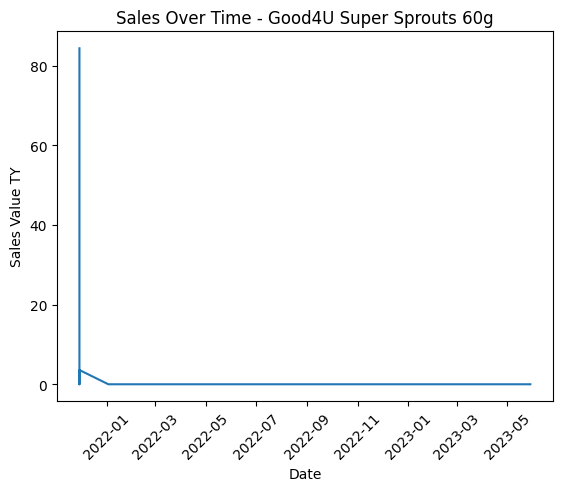

In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Filter the DataFrame for the specific product
product_sales = one_product[one_product['TPNB Description'] == 'Good4U Super Sprouts 60g']

# Convert the 'DATE_TIME' column to datetime format
product_sales['DATE_TIME'] = pd.to_datetime(product_sales['DATE_TIME'])

# Sort the DataFrame by the 'DATE_TIME' column
product_sales = product_sales.sort_values('DATE_TIME')

# Create a line plot for sales over time
plt.plot(product_sales['DATE_TIME'], product_sales['Sales Value TY'])

# Set the plot title and labels
plt.title('Sales Over Time - Good4U Super Sprouts 60g')
plt.xlabel('Date')
plt.ylabel('Sales Value TY')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Format y-axis labels with thousands separators
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.show()
